In [1]:
#Name:Rahul Patil
#PRN : 20230901013
# import system Libs
import os
import itertools
from PIL import Image # pillow
# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print ('modules loaded')

ModuleNotFoundError: No module named 'numpy'

In [3]:
# Generate data paths with Labels
train_data_dir = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Train"
filepaths = []
labels = []
folds = os.listdir(train_data_dir)
#print(folds)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
# Concatenate data paths with Labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [4]:
train_df

,filepaths,labels
0,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
1,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
2,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
3,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
4,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
...,...,...
532,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
533,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
534,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
535,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox


In [5]:
#Generate data paths with Labels
test_data_dir = r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Original Images\FOLDS\fold1\Test"
filepaths = []
labels = []
folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
# Concatenate data paths with Labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [6]:
ts_df

,filepaths,labels
0,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
1,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
2,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
3,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
4,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
...,...,...
69,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
70,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
71,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
72,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox


In [7]:
#valid and test dataframe
valid_df, test_df = train_test_split(ts_df, train_size= 0.5, shuffle= True, random_state= 123)
test_df

,filepaths,labels
67,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
53,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
60,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
52,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
51,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
64,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
69,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Monkeypox
23,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Healthy
8,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox
4,C:\Users\user\OneDrive\Desktop\MPOX Dataset\Or...,Chickenpox


In [8]:
# crobed image size
batch_size = 16
img_size = (224, 224)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)
valid_gen = ts_gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)
test_gen = ts_gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 537 validated image filenames belonging to 6 classes.
Found 37 validated image filenames belonging to 6 classes.
Found 37 validated image filenames belonging to 6 classes.


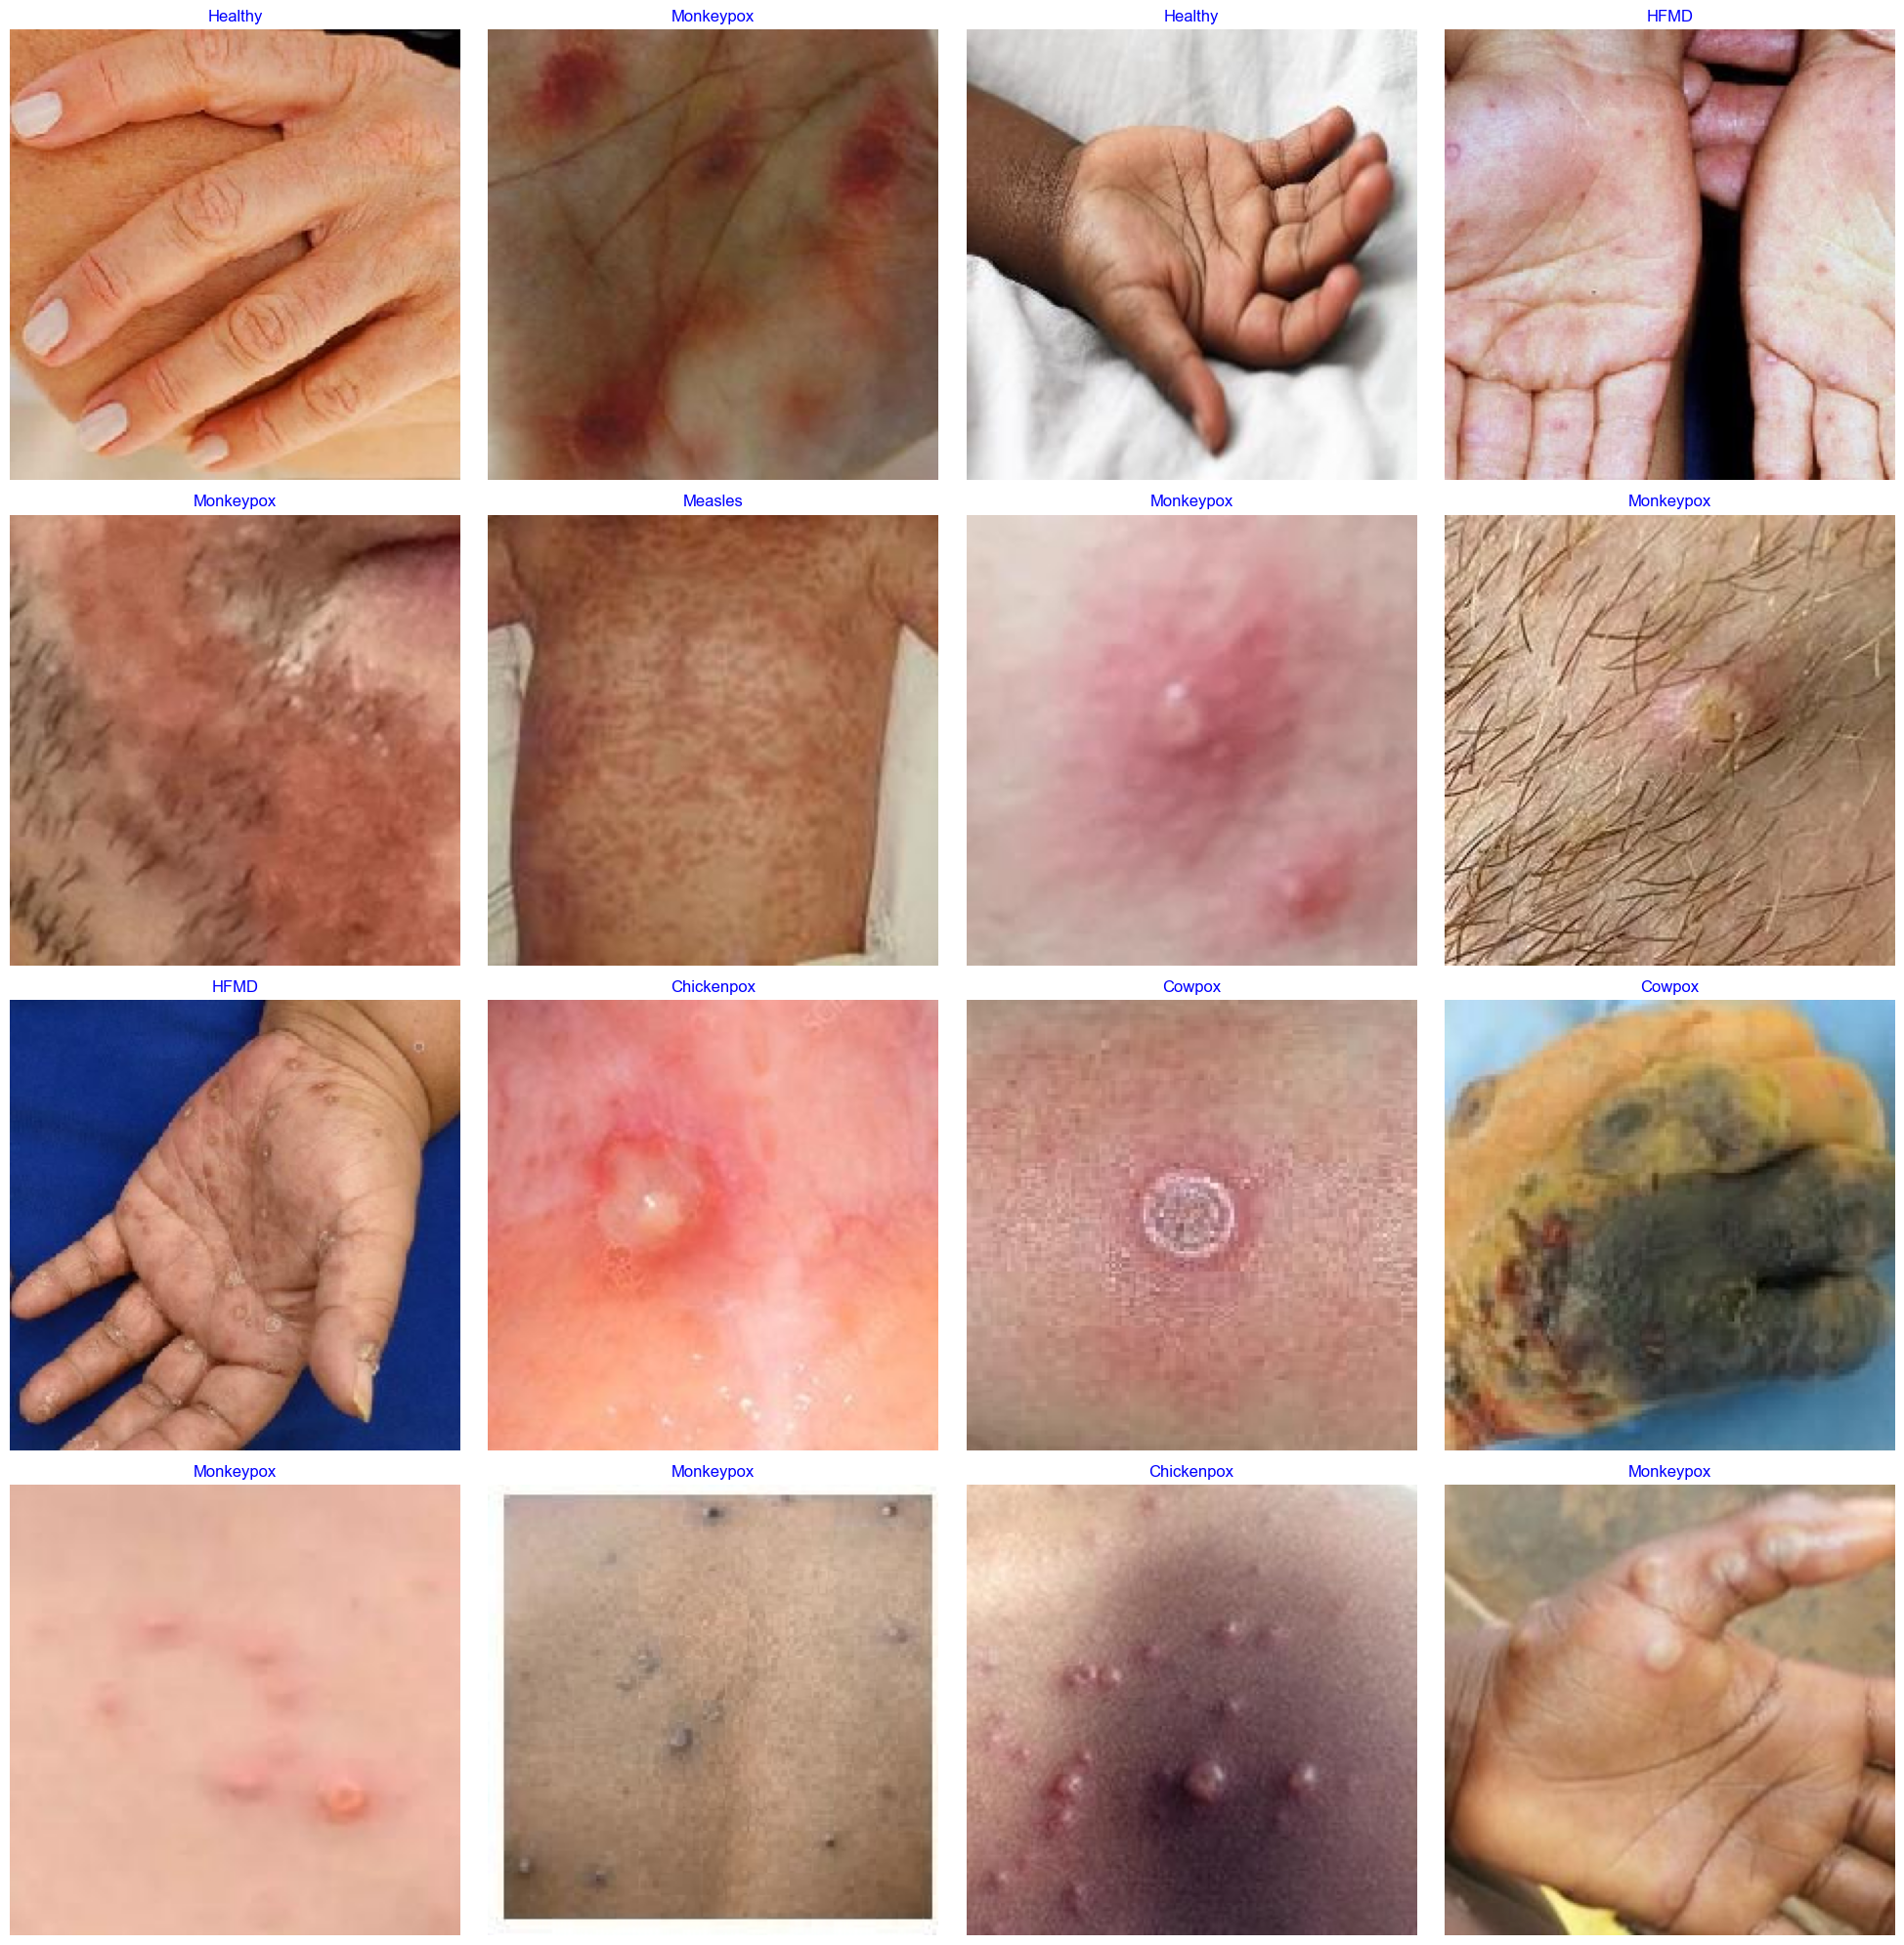

In [9]:
g_dict = train_gen.class_indices  # defines dictionary {'class': index}
classes = list(g_dict.keys())  # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)  # get a batch size samples from the generator
# # difference between next iterator and for iterator
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255  # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]  # get class of image
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
    plt.tight_layout()

In [10]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))  # to define number of classes in dense layer
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(64, activation="relu"),
    Dense(class_count, activation="softmax")
])
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 802816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   205,521,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,576,710 (784.21 MB)

 Trainable params: 205,576,710 (784.21 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 30  # number of all epochs in training
history = model.fit(train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, shuffle=False)

Epoch 1/30


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.2569 - loss: 2915.5745 - val_accuracy: 0.2432 - val_loss: 2.1521
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.4288 - loss: 1.6659 - val_accuracy: 0.4324 - val_loss: 1.6116
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.5973 - loss: 1.1472 - val_accuracy: 0.4054 - val_loss: 1.7348
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.7609 - loss: 0.8353 - val_accuracy: 0.4595 - val_loss: 1.7809
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7937 - loss: 0.6591 - val_accuracy: 0.4595 - val_loss: 2.2909
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8558 - loss: 0.4519 - val_accuracy: 0.5135 - val_loss: 2.1005
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.8866 - loss: 0.3280 - val_accuracy: 0.4595 - val_loss: 2.1675
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9387 - loss: 0.2216 - val_accuracy: 0.3784 - val_loss: 3.2692


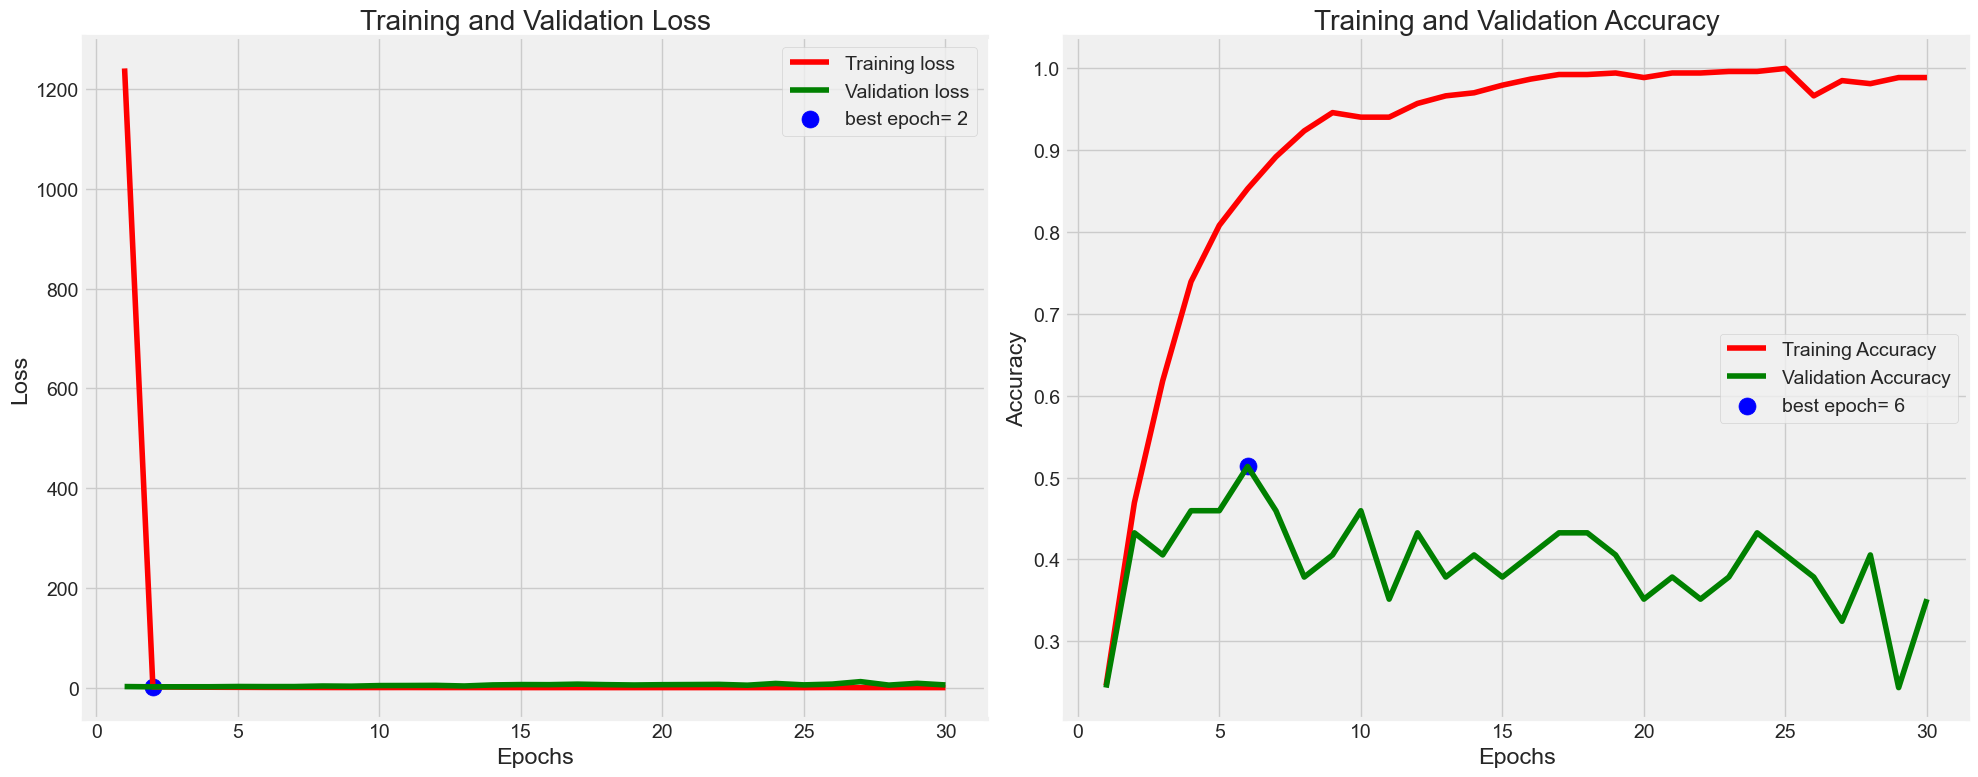

In [12]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
train_score = model.evaluate(train_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(test_gen, verbose=1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
preds = model.predict(test_gen)  # Corrected line
y_pred = np.argmax(preds, axis=1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 0.9970 - loss: 0.0265
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.3241 - loss: 5.4134


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.3476 - loss: 5.2535
Train Loss:  0.02546832524240017
Train Accuracy:  0.9981378316879272
--------------------
Validation Loss:  5.3818254470825195
Validation Accuracy:  0.3513513505458832
--------------------
Test Loss:  5.275195598602295
Test Accuracy:  0.3513513505458832
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


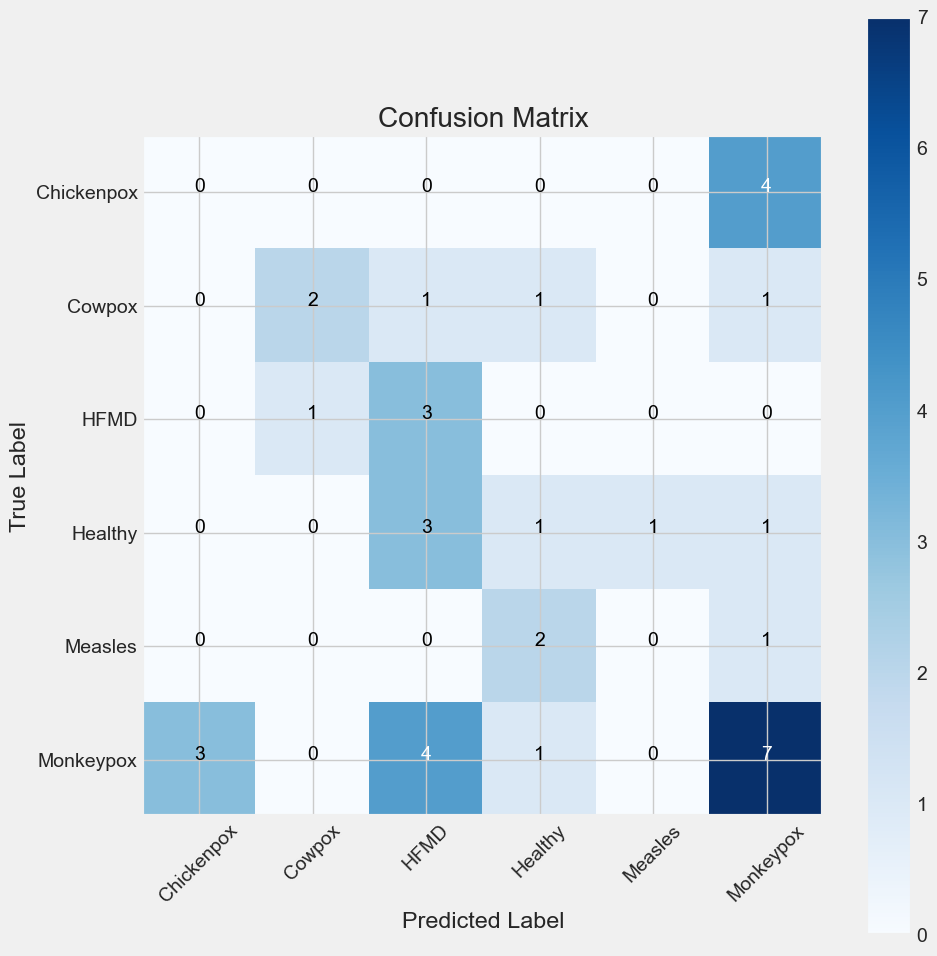

              precision    recall  f1-score   support

  Chickenpox       0.00      0.00      0.00         4
      Cowpox       0.67      0.40      0.50         5
        HFMD       0.27      0.75      0.40         4
     Healthy       0.20      0.17      0.18         6
     Measles       0.00      0.00      0.00         3
   Monkeypox       0.50      0.47      0.48        15

    accuracy                           0.35        37
   macro avg       0.27      0.30      0.26        37
weighted avg       0.35      0.35      0.34        37



In [14]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names=classes))

In [15]:
model.save('Mpox classification.keras')

In [16]:
loaded_model = tf.keras.models.load_model(r"C:\Users\user\OneDrive\Desktop\MPOX Dataset\Mpox classification.keras", compile=False)
loaded_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# my code for prediction
import os
from PIL import Image
import numpy as np
import tensorflow as tf

# Specify the path to an actual image file
image_path = 'C:/Users/user/OneDrive/Desktop/MPOX Dataset/Original Images/FOLDS/fold1/Valid/Cowpox/CWP_05_01.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0] #added [0] to remove array in array

# Map the index to a class label (assuming you used flow_from_directory)
class_labels = {0: 'Chickenpox', 1: 'Cowpox', 2: 'HFMD', 3: 'Healthy', 4: 'Measles', 5: 'Monkeypox'} #replace with your classes. If you used flow from directory, use the below code instead.
# class_labels = {v: k for k, v in test_gen.class_indices.items()} #test_gen being the name of your testing image generator.

predicted_class_label = class_labels[predicted_class_index]
# Print the result
print(f"The predicted tumor type is: {predicted_class_label}")
# Print the predictions for debugging.
print(f"Predictions: {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
The predicted tumor type is: Chickenpox
Predictions: [[8.7032712e-01 1.5664818e-03 5.0733285e-03 1.2172531e-01 2.2078371e-04
  1.0869559e-03]]
